### Cauchy's integral formula

Let $\Omega$ be an open subset of the complex plane $\mathbb{C}$, $f : 
\Omega\mapsto \mathbb{C}$ be an analytic function.  If $D\subset \Omega$ is a closed set and the boundary $\partial D\equiv \Gamma$ has finite length and has winding number 1 about any $x\in D$, then

$$f(x)=\frac{1}{2\pi i} \oint_{\Gamma} \frac{f(z)}{z-x} dz, \quad \forall x\in D. 
\tag{1}$$ 

### Use Cauchy's integral formula to define matrix functions

Let $\Omega$ be an open subset of the complex plane $\mathbb{C}$, $f : 
\Omega\mapsto \mathbb{C}$ be an analytic function.  If $D\subset \Omega$ is a closed set, the boundary $\partial D\equiv \Gamma$ has finite length and has winding number 1 about any $x\in D$, and $\Gamma$ encloses all the eigenvalues of $A\in \mathbb{C}^{N\times N}$, then the matrix function $f(A)$ can be defined by

$$f(A)=\frac{1}{2\pi i} \oint_{\Gamma} f(z)(zI-A)^{-1} dz.
\tag{2}$$ 

Here $I$ is the $N$ dimensional identity matrix.

**Remark:** The definition of Eq. (2) is a more general way to define matrix functions. It is consistent with the definition using Taylor expansion, or matrix diagonalization when these choices are applicable. 

### Matrix exponential

**Theorem** Let $f(x;t)=e^{tx}$ and $e^{tA}$ is defined according to Eq. (2), then

$$\frac{d}{dt} e^{tA} = A e^{tA}. 
\tag{3}$$

Proof: 

$$
\begin{split}
\frac{d}{dt} e^{tA} &= \frac{d}{dt}\frac{1}{2\pi i} \oint_{\Gamma} e^{tz}(zI-A)^{-1} dz\\
&=\frac{1}{2\pi i} \oint_{\Gamma} e^{tz}z(zI-A)^{-1} dz\\
&=\frac{1}{2\pi i} \oint_{\Gamma} e^{tz}(zI-A+A)(zI-A)^{-1} dz\\
&=\frac{1}{2\pi i} \oint_{\Gamma} e^{tz} dz + A \frac{1}{2\pi i} \oint_{\Gamma} e^{tz}(zI-A)^{-1} dz\\
&=A \frac{1}{2\pi i} \oint_{\Gamma} e^{tz}(zI-A)^{-1} dz = A e^{tA}.
\end{split}
$$

### Computation with Cauchy contour integral

In fact Eq. (2) can work as a computational tool as well!

Select contour points simply from a circle with radius $r$ larger than the magnitude of the largest eigenvalue of $A$.

$$z_l=r e^{i\theta_l},\quad w_l=r e^{i\theta_l} \frac{i \Delta\theta}{2\pi i}$$ 

with trapezoidal rule, so that

$$f(A)\approx \sum_{l=1}^{Npole} e^{z_l} (z_l I - A) w_l.$$

Later in the class we will study more powerful contour integral techniques.

In [1]:
using LinearAlgebra

# Example of using Cauchy contour integral formula for computing matrix exponential
n = 10
I_n = Matrix(1.0I, n, n)
A = randn(n,n)
# Reference matrix function
fA1 = exp(A)
# Diagonalization
fact = eigen(A)
S = fact.values
U = fact.vectors
fA2 = U*diagm(0=>exp.(S))*inv(U)
# Contour integral, discretized via the trapezoidal rule
r = maximum(abs.(S))
Npole = 60
theta = LinRange(0,2*pi,Npole+1)
theta = theta[1:Npole]
z = 2.0*r*exp.(theta*im)
w = 2.0*r*exp.(theta*im)*(theta[2]-theta[1]) * im / (2.0*pi *im)
fA3 = zeros(n,n)
for l = 1 : Npole
    fA3 += exp.(z[l]) * inv(z[l]*I_n-A) * w[l]
end
println("||e^{A}-e^{A}_{diag}||_2 = ", norm(fA1-fA2,2))
println("||e^{A}-e^{A}_{cauchy}||_2 = ", norm(fA1-fA3,2))

||e^{A}-e^{A}_{diag}||_2 = 2.1878844648339614e-14
||e^{A}-e^{A}_{cauchy}||_2 = 3.9406783074944927e-13


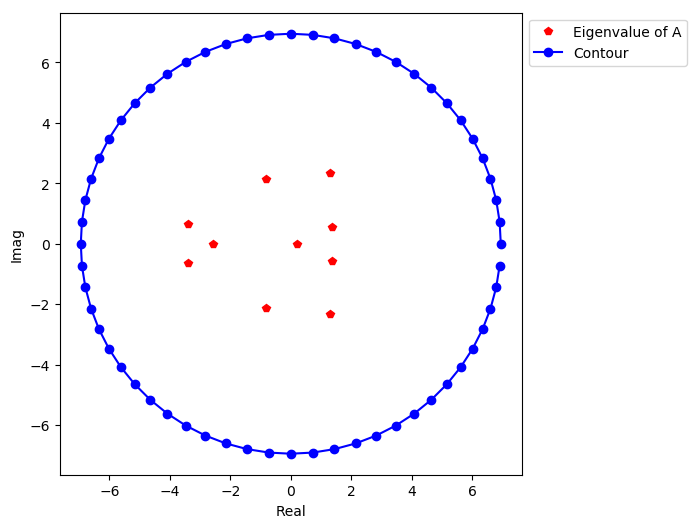

PyObject <matplotlib.legend.Legend object at 0x0000000031779320>

In [2]:
# Plotting the contour
using PyPlot
figure(1,figsize=(6,6))
plot(real(S),imag(S),"rp", label="Eigenvalue of A")
plot(real(z),imag(z),"b-o", label="Contour")
axis("image")
xlabel("Real")
ylabel("Imag")
legend(bbox_to_anchor=(1, 1))

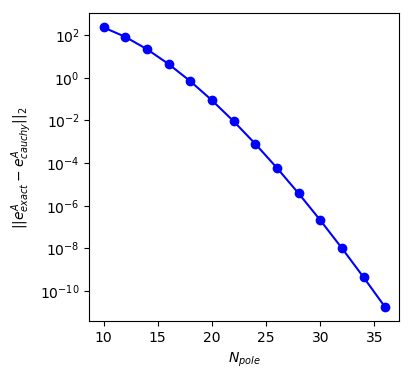

PyObject Text(34.49999999999999, 0.5, '$||e^A_{exact}-e^A_{cauchy}||_2$')

In [3]:
# Plot the convergence rate of pole expansion

NpoleList = collect(10:2:36)
ErrList = zeros(size(NpoleList))
r = maximum(abs.(S))

for iList = 1 : length(NpoleList)
    Npole = NpoleList[iList]
    theta = LinRange(0,2*pi,Npole+1)
    theta = theta[1:Npole]
    z = 2.0*r*exp.(theta*im)
    w = 2.0*r*exp.(theta*im)*(theta[2]-theta[1]) * im / (2.0*pi *im)
    fA3 = zeros(n,n)
    for l = 1 : Npole
        fA3 += exp.(z[l]) * inv(z[l]*I_n-A) * w[l]
    end
    ErrList[iList] = norm(fA1-fA3,2)
end
figure(1,figsize=(4,4))
semilogy(NpoleList,ErrList,"b-o")
xlabel(L"N_{pole}")
ylabel(L"||e^A_{exact}-e^A_{cauchy}||_2")